In [1]:
%matplotlib inline
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

import numpy as np
import math

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import itertools
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
from numpy import isnan
from pandas import DataFrame
from sklearn.impute import KNNImputer
import imblearn


import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data
adni_df = pd.read_csv('D:/PM/ADNI_EDA/data/ADNIMERGE.csv')


Labelling

In [3]:
encoders = dict()
for col_name in adni_df.columns:
    le = preprocessing.LabelEncoder()
    le.fit(adni_df[col_name].astype(str))
    adni_df[col_name] = adni_df[col_name].map(lambda x: le.transform([x])[0] if type(x)==str else x)
    encoders[col_name] = le

In [4]:
encoders['DX'].classes_

array(['CN', 'Dementia', 'MCI', 'nan'], dtype=object)

In [5]:
#Y=adni_df.DX
X=adni_df.copy()
X=X.drop('DX',axis='columns')
X=X.drop('DX_bl',axis='columns')

FirstLevelClasses = adni_df.DX.unique()
FirstLevelClasses_Dictionary = dict(zip(FirstLevelClasses, range(len(FirstLevelClasses))))
First_df=adni_df.replace(FirstLevelClasses_Dictionary)
Y=First_df.DX
X = X.loc[Y != 3]
Y = Y.loc[Y != 3]


In [21]:
dataset['DX'].unique()

array([0., 1., 2.])

Standardization

In [20]:
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
trans = StandardScaler()
data = trans.fit_transform(X)
dataset = DataFrame(data)
dataset.columns = X.columns
dataset.index = Y.index
dataset['DX']=Y

Imputation

In [22]:
imputer = KNNImputer(n_neighbors=10, weights='uniform', metric='nan_euclidean')
imputer.fit(dataset)
imputed = imputer.transform(dataset)
imputed=DataFrame(imputed)
imputed.columns = dataset.columns


In [23]:
Y=imputed.DX
X=imputed.copy()
X=X.drop('DX',axis='columns')




In [24]:
from collections import Counter
from numpy import where
from matplotlib import pyplot
counter = Counter(Y)


In [25]:
Y.unique()

array([0., 1., 2.])

In [26]:
from imblearn.over_sampling import SMOTE
oversample =SMOTE()
X, Y = oversample.fit_resample(X, Y)

For finding best features

In [23]:

from mlxtend.feature_selection import SequentialFeatureSelector as SFS


#Define Sequential Forward Selection (sfs)
sfs = SFS(RandomForestRegressor(),
           k_features=15,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)
#Use SFS to select the top 5 features 
sfs.fit(X, Y)

#Create a dataframe for the SFS results 
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
df_SFS_results


STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

,feature_idx,cv_scores,avg_score,feature_names
1,"(60,)",[0.8209467273266091],0.820947,"(mPACCtrailsB,)"
2,"(60, 76)",[0.9430563532912947],0.943056,"(mPACCtrailsB, mPACCtrailsB_bl)"
3,"(21, 60, 76)",[0.9621731690352009],0.962173,"(CDRSB, mPACCtrailsB, mPACCtrailsB_bl)"
4,"(0, 21, 60, 76)",[0.9724175907156427],0.972418,"(RID, CDRSB, mPACCtrailsB, mPACCtrailsB_bl)"
5,"(0, 21, 60, 62, 76)",[0.9750231796660433],0.975023,"(RID, CDRSB, mPACCtrailsB, CDRSB_bl, mPACCtrai..."
6,"(0, 4, 21, 60, 62, 76)",[0.9764253567502369],0.976425,"(RID, SITE, CDRSB, mPACCtrailsB, CDRSB_bl, mPA..."
7,"(0, 4, 21, 60, 62, 76, 112)",[0.977605765830437],0.977606,"(RID, SITE, CDRSB, mPACCtrailsB, CDRSB_bl, mPA..."
8,"(0, 4, 21, 60, 62, 76, 95, 112)",[0.9783648597693577],0.978365,"(RID, SITE, CDRSB, mPACCtrailsB, CDRSB_bl, mPA..."
9,"(0, 4, 21, 60, 62, 76, 84, 95, 112)",[0.9790522202968821],0.979052,"(RID, SITE, CDRSB, mPACCtrailsB, CDRSB_bl, mPA..."
10,"(0, 3, 4, 21, 60, 62, 76, 84, 95, 112)",[0.9792772576671187],0.979277,"(RID, PTID, SITE, CDRSB, mPACCtrailsB, CDRSB_b..."


In [76]:
#Features=['RID','PTID','AGE','mPACCtrailsB','ADAS11_bl','RAVLT_immediate_bl','mPACCdigit_bl','mPACCtrailsB_bl','Ventricles_bl','FDG_bl','Month_bl']

In [24]:
feature=df_SFS_results.loc[14]['feature_names']
Features=list(feature)


In [27]:
Features=['RID','PTID',
 'SITE',
 'AGE',
 'CDRSB',
 'mPACCtrailsB',
 'CDRSB_bl',
 'mPACCdigit_bl',
 'mPACCtrailsB_bl',
 'Fusiform_bl',
 'EcogSPMem_bl',
 'PTAU_bl',
 'FDG_bl',
 'M']

In [36]:
X_new=X[Features]

For finding optimum number of feature


STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

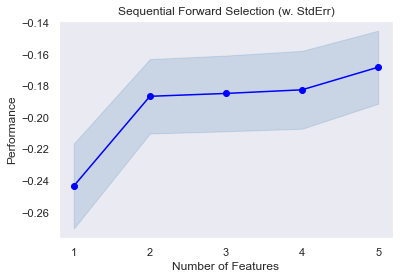

In [86]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#Define Sequential Forward Selection (sfs)
sfs = SFS(RandomForestRegressor(), 
          k_features=114, 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=5)

sfs = sfs.fit(X, Y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [37]:
train_X, val_X, train_y, val_y = train_test_split(X_new, Y,random_state = 0)

Random Forrest

In [38]:
forest_model_Level1 = RandomForestRegressor(random_state=1)
forest_model_Level1.fit(train_X, train_y)
preds = forest_model_Level1.predict(val_X)
print(mean_absolute_error(val_y, preds))

0.13255833333333333


In [39]:
val_y=val_y.astype(int)
preds=preds.astype(int)
accuracy_score(val_y, preds)

0.7313888888888889

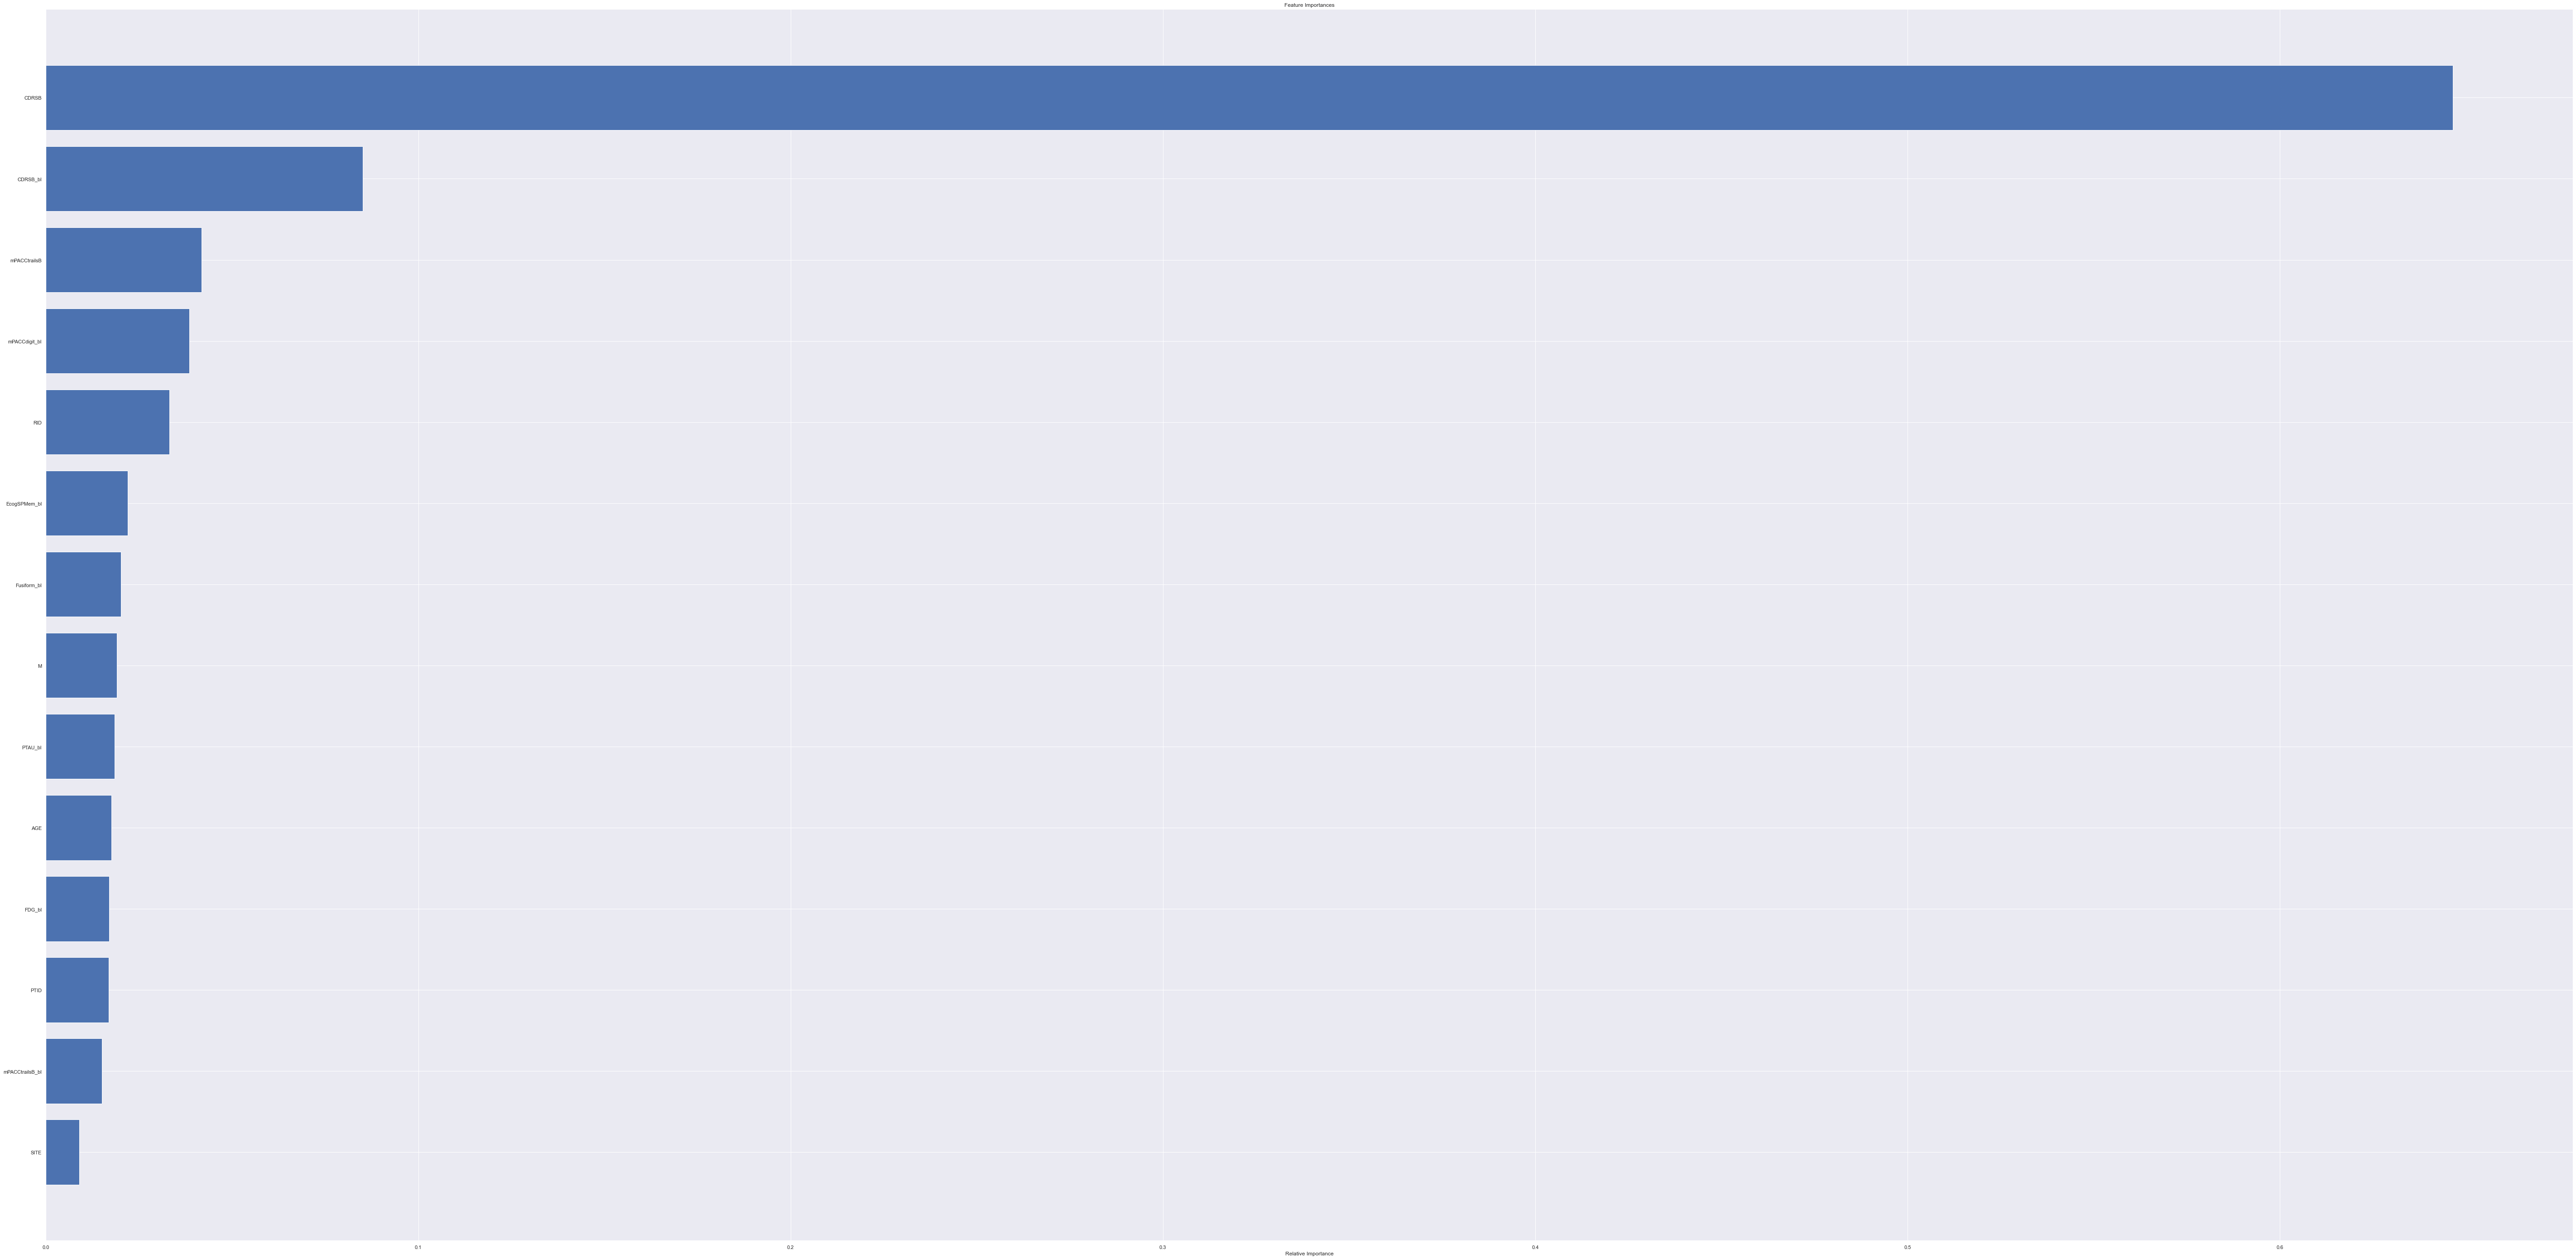

In [40]:
importances = forest_model_Level1.feature_importances_
indices = np.argsort(importances)
features = train_X.columns
fig = plt.figure(figsize=(100,50))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [41]:
val_y=val_y.reset_index(drop=True)

In [42]:
Out = {'Predicted': preds, 'Actual':val_y }
Level1Out = pd.DataFrame(data=Out)

In [43]:
Level1Out

,Predicted,Actual
0,0,0
1,1,1
2,2,2
3,0,2
4,1,1
...,...,...
3595,1,1
3596,1,1
3597,1,1
3598,1,1


Second Level

In [49]:
Second_df = adni_df.loc[adni_df.DX == 2]

In [50]:
encoders['DX_bl'].classes_

array(['AD', 'CN', 'EMCI', 'LMCI', 'SMC', 'nan'], dtype=object)

In [51]:
Y=Second_df.DX_bl
X=Second_df.copy()
X=X.drop('DX',axis='columns')
X=X.drop('DX_bl',axis='columns')

In [52]:
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
trans = StandardScaler()
data = trans.fit_transform(X)
dataset = DataFrame(data)
dataset.columns = X.columns
dataset.index = Y.index
dataset['DX_bl']=Y

In [53]:
dataset

,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,APOE4,FDG,PIB,AV45,FBB,ABETA,TAU,PTAU,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,LDELTOTAL,DIGITSCOR,TRABSCOR,FAQ,MOCA,EcogPtMem,EcogPtLang,EcogPtVisspat,EcogPtPlan,EcogPtOrgan,EcogPtDivatt,EcogPtTotal,EcogSPMem,EcogSPLang,EcogSPVisspat,EcogSPPlan,EcogSPOrgan,EcogSPDivatt,EcogSPTotal,FLDSTRENG,...,ADASQ4_bl,MMSE_bl,RAVLT_immediate_bl,RAVLT_learning_bl,RAVLT_forgetting_bl,RAVLT_perc_forgetting_bl,LDELTOTAL_BL,DIGITSCOR_bl,TRABSCOR_bl,FAQ_bl,mPACCdigit_bl,mPACCtrailsB_bl,FLDSTRENG_bl,FSVERSION_bl,IMAGEUID_bl,Ventricles_bl,Hippocampus_bl,WholeBrain_bl,Entorhinal_bl,Fusiform_bl,MidTemp_bl,ICV_bl,MOCA_bl,EcogPtMem_bl,EcogPtLang_bl,EcogPtVisspat_bl,EcogPtPlan_bl,EcogPtOrgan_bl,EcogPtDivatt_bl,EcogPtTotal_bl,EcogSPMem_bl,EcogSPLang_bl,EcogSPVisspat_bl,EcogSPPlan_bl,EcogSPOrgan_bl,EcogSPDivatt_bl,EcogSPTotal_bl,ABETA_bl,TAU_bl,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,FBB_bl,Years_bl,Month_bl,Month,M,update_stamp,DX_bl
5,-1.344780,-1.095696,-0.907210,-0.932827,-0.516463,-1.090257,-1.609801,-0.726092,0.812038,-2.121023,-5.113366,0.251510,-0.267219,-0.81699,NaN,NaN,NaN,NaN,1.089503,-0.860111,-0.605723,-0.512303,0.871842,0.733422,0.307227,-0.220347,0.237021,1.117802,-0.244811,-0.556984,-0.738772,-1.110812,2.412014,-0.762433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.753066,...,0.403765,-0.492644,0.093874,1.010625,-0.192410,-0.573434,-0.720288,-1.307893,2.833237,-0.668855,-0.844106,-1.249205,-0.94004,1.104219,-0.723843,0.030322,-0.104124,1.063498,0.448213,0.424785,-0.180134,0.882547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.889086,-0.952736,-0.747808,NaN,NaN,NaN,NaN,-0.830611,-0.830611,-0.826718,-0.825282,-1.840165,3.0
6,-1.344780,-1.095696,-0.907210,-0.932827,-0.516463,-0.822997,-1.515702,-0.726092,0.812038,-2.121023,-5.113366,0.251510,-0.267219,-0.81699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.961813,1.464950,1.271102,0.687429,0.224438,-0.120627,1.117802,-1.376259,-1.128487,NaN,-1.195513,0.425213,-0.762433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.753066,...,0.403765,-0.492644,0.093874,1.010625,-0.192410,-0.573434,-0.720288,-1.307893,2.833237,-0.668855,-0.844106,-1.249205,-0.94004,1.104219,-0.723843,0.030322,-0.104124,1.063498,0.448213,0.424785,-0.180134,0.882547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.889086,-0.952736,-0.747808,NaN,NaN,NaN,NaN,-0.644867,-0.644867,-0.632561,-0.630729,-1.840165,3.0
7,-1.344780,-1.095696,-0.907210,-0.932827,-0.516463,-0.466651,-1.376600,-0.726092,0.812038,-2.121023,-5.113366,0.251510,-0.267219,-0.81699,NaN,NaN,NaN,NaN,0.445543,-0.841641,-0.605700,-0.512303,1.004303,0.823483,0.687429,-0.665132,0.237021,-0.021793,-1.376259,-1.097054,-0.536346,-0.687305,1.938238,-0.762433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.753066,...,0.403765,-0.492644,0.093874,1.010625,-0.192410,-0.573434,-0.720288,-1.307893,2.833237,-0.668855,-0.844106,-1.249205,-0.94004,1.104219,-0.723843,0.030322,-0.104124,1.063498,0.448213,0.424785,-0.180134,0.882547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.889086,-0.952736,-0.747808,NaN,NaN,NaN,NaN,-0.436834,-0.436834,-0.438403,-0.436175,-1.840165,3.0
8,-1.344780,-1.095696,-0.907210,-0.932827,-0.516463,0.513301,-1.247727,-0.726092,0.812038,-2.121023,-5.113366,0.251510,-0.267219,-0.81699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.512303,2.058059,1.674361,0.687429,-0.220347,0.862906,1.497668,-0.999110,-1.002755,NaN,-0.856708,0.471062,-0.531320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.753066,...,0.403765,-0.492644,0.093874,1.010625,-0.192410,-0.573434,-0.720288,-1.307893,2.833237,-0.668855,-0.844106,-1.249205,-0.94004,1.104219,-0.723843,0.030322,-0.104124,1.063498,0.448213,0.424785,-0.180134,0.882547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.889086,-0.952736,-0.747808,NaN,NaN,NaN,NaN,-0.244722,-0.244719,-0.244245,-

In [54]:
imputer = KNNImputer(n_neighbors=10, weights='uniform', metric='nan_euclidean')
imputer.fit(dataset)
imputed = imputer.transform(dataset)
imputed=DataFrame(imputed)
imputed.columns = dataset.columns

In [55]:
Y=imputed.DX_bl
X=imputed.copy()
X=X.drop('DX_bl',axis='columns')
from imblearn.over_sampling import SMOTE
oversample =SMOTE()
X, Y = oversample.fit_resample(X, Y)
X_new=X[Features]

In [56]:
train_X, val_X, train_y, val_y = train_test_split(X_new, Y,random_state = 0)

In [57]:


forest_model_Level2 = RandomForestRegressor(random_state=1)
forest_model_Level2.fit(train_X, train_y)
preds = forest_model_Level2.predict(val_X)
print(mean_absolute_error(val_y, preds))

0.02970937129300118


In [58]:
val_y=val_y.astype(int)
preds=preds.astype(int)
accuracy_score(val_y, preds)

0.9104389086595492

In [59]:
val_y=val_y.reset_index(drop=True)
Out = {'Predicted': preds, 'Actual':val_y }
Level2Out = pd.DataFrame(data=Out)
Level2Out

,Predicted,Actual
0,0,0
1,2,2
2,2,2
3,3,3
4,4,4
...,...,...
3367,0,0
3368,0,0
3369,0,0
3370,4,4


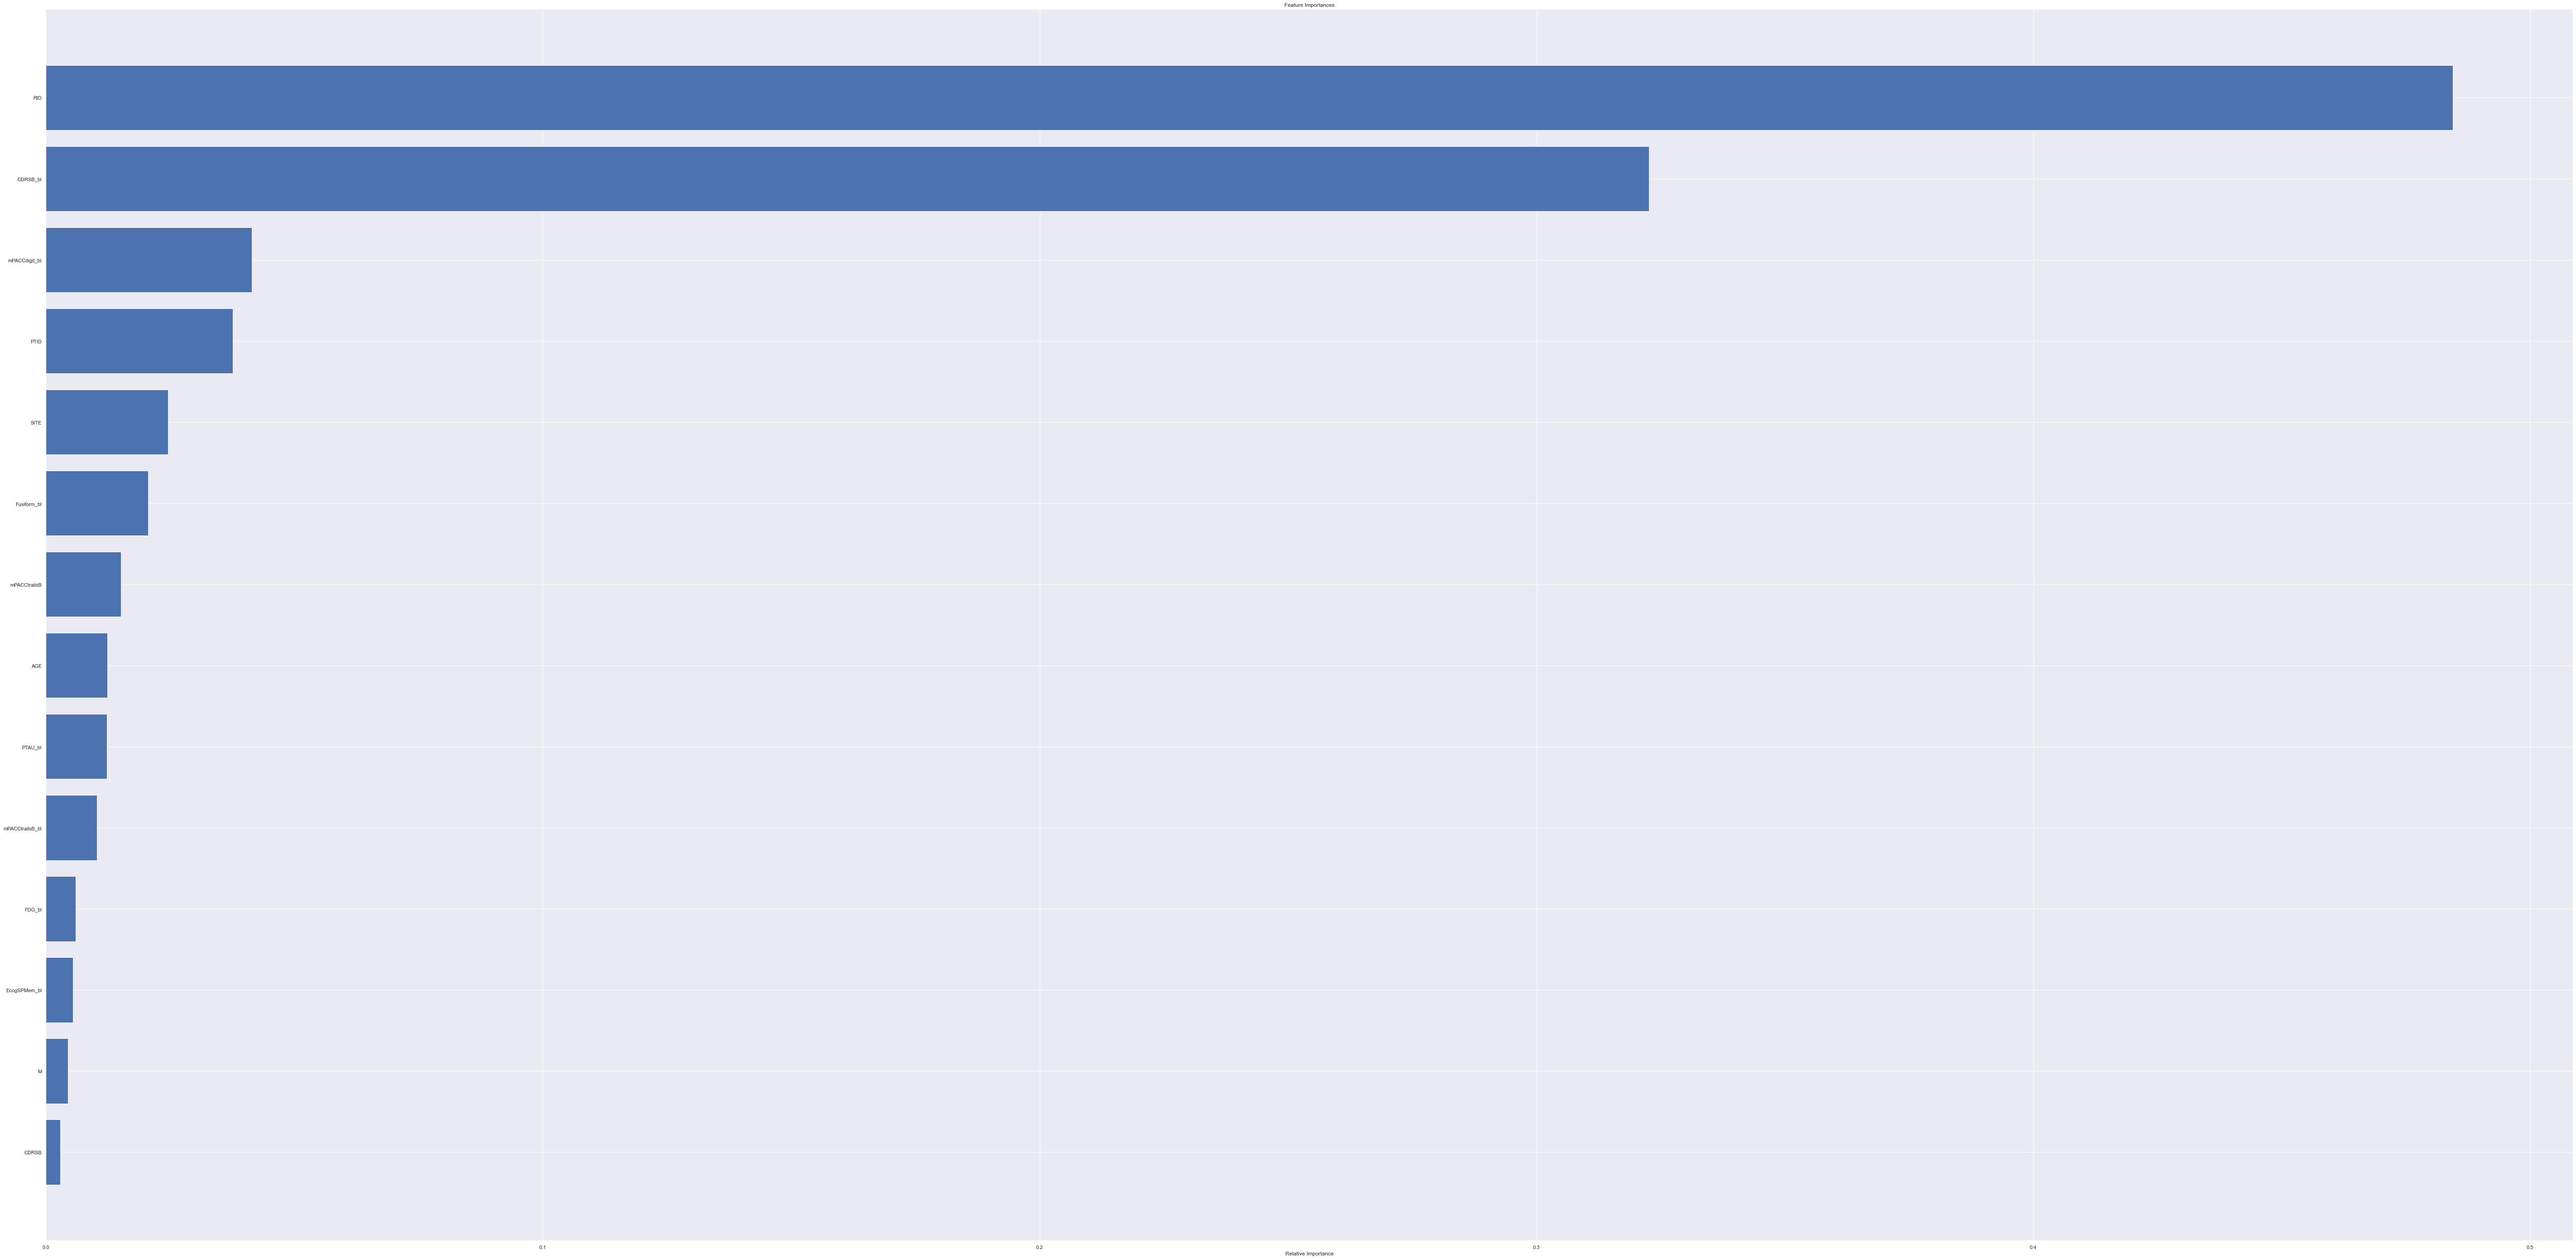

In [60]:
importances = forest_model_Level2.feature_importances_
indices = np.argsort(importances)
features = train_X.columns
fig = plt.figure(figsize=(100,50))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Combined